# Exercises XP
Done 

## What you will learn
Learn how to load, inspect, and preprocess data using Python and its libraries. This includes handling CSV files, cleaning data, and splitting datasets into training and testing sets.
Understand the fundamentals of EDA, such as analyzing data distributions, identifying patterns, and extracting insights from datasets.
Machine Learning Model Building: Gain hands-on experience in building machine learning models using different algorithms like Logistic Regression, Support Vector Machines (SVM), and XGBoost.
Learn the importance of hyperparameters in machine learning models and how to optimize them using techniques like Grid Search.
Develop skills in assessing the performance of machine learning models using various metrics and techniques.
Enhance your ability to make decisions about model selection, hyperparameter settings, and interpret the outcomes of your analyses.


## What you will create
series of machine learning models capable of classifying species of the Iris flower based on their characteristics.
Comparison of Model Performances
Comprehensive Analysis Report
Hyperparameter Tuning Framework
Data Visualization Tools


## You will be using this dataset: Heart Disease Prediction Dataset

## 🌟 Exercise 1 : Exploratory Data Analysis
### Instructions
* Load the data from CSV files
* Remove target column from the training data
* Split the data intro train/test split
* Understand the data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
# 1. Charger les données
df = pd.read_csv('dataset_heart.csv')

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Charger les données
df = pd.read_csv('dataset_heart.csv')

# 2. Afficher les noms de colonnes
print("Colonnes disponibles :", df.columns.tolist())


Colonnes disponibles : ['age', 'sex ', 'chest pain type', 'resting blood pressure', 'serum cholestoral', 'fasting blood sugar', 'resting electrocardiographic results', 'max heart rate', 'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels', 'thal', 'heart disease']


In [9]:
# Nettoyer les noms de colonnes : enlever les espaces, mettre en minuscules, remplacer par underscore
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [10]:
# Séparer features et cible
X = df.drop(columns=['heart_disease'])  # nom correct après nettoyage
y = df['heart_disease']

In [11]:
# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Affichage rapide pour exploration
print("Aperçu :")
print(df.head())

print("\nInfos :")
print(df.info())

print("\nStatistiques :")
print(df.describe())

print("\nValeurs manquantes :")
print(df.isnull().sum())

Aperçu :
   age  sex  chest_pain_type  resting_blood_pressure  serum_cholestoral  \
0   70    1                4                     130                322   
1   67    0                3                     115                564   
2   57    1                2                     124                261   
3   64    1                4                     128                263   
4   74    0                2                     120                269   

   fasting_blood_sugar  resting_electrocardiographic_results  max_heart_rate  \
0                    0                                     2             109   
1                    0                                     2             160   
2                    0                                     0             141   
3                    0                                     0             105   
4                    0                                     2             121   

   exercise_induced_angina  oldpeak  st_segment  major_vess

Mon jeu de données est maintenant :

* complet : aucune valeur manquante.

* nettoyé : noms de colonnes uniformes.

* équilibré : la cible heart_disease semble binaire (1 ou 2, à vérifier).

* prêt pour la modélisation ou la visualisation.

## 🌟 Exercise 2 : Logistic Regression without Grid Search
### Instructions
Use the dataset to build a logistic regression model without using grid search. Split the data into training and testing sets, then train a logistic regression model and evaluate its performance on the test set.

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [14]:
# 1. Charger et nettoyer les données
df = pd.read_csv('dataset_heart.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [15]:
# 2. Définir X et y
X = df.drop(columns=['heart_disease'])
y = df['heart_disease']

In [16]:
# 3. Vérifier les valeurs de la cible (binaire ?)
print("Valeurs uniques de la cible :", y.unique())

Valeurs uniques de la cible : [2 1]


In [17]:
# 💡 Facultatif : recoder 1 = pas malade, 2 = malade => 0 / 1
y = y.map({1: 0, 2: 1})  # si besoin

In [18]:
# 4. Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# 5. Créer et entraîner le modèle
model = LogisticRegression(max_iter=200000)  # max_iter augmenté si convergence lente
model.fit(X_train, y_train)

LogisticRegression(max_iter=200000)

In [25]:
# 6. Prédictions et évaluation
y_pred = model.predict(X_test)

print("\nAccuracy :", accuracy_score(y_test, y_pred))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred))
print("\nRapport de classification :\n", classification_report(y_test, y_pred))


Accuracy : 0.9259259259259259

Matrice de confusion :
 [[32  1]
 [ 3 18]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.95      0.86      0.90        21

    accuracy                           0.93        54
   macro avg       0.93      0.91      0.92        54
weighted avg       0.93      0.93      0.93        54



Très bon résultat :

* **Accuracy : 92,6 %**
* **Classe 0 (non malade)** : excellente précision et rappel
* **Classe 1 (malade)** : un peu moins de rappel (86 %), mais très bon dans l’ensemble

### Résumé :

* Ton modèle **prédit bien**, surtout les non-malades.
* Il **rate 3 malades** (faux négatifs), ce qui peut être critique selon le contexte.



## 🌟 Exercise 3 : Logistic Regression with Grid Search
### Instructions
Build a logistic regression model using the dataset, but this time, use GridSearchCV to optimize the hyperparameters such as C and penalty.

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
# 1. Charger et nettoyer les données
df = pd.read_csv('dataset_heart.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

X = df.drop(columns=['heart_disease'])
y = df['heart_disease'].map({1: 0, 2: 1})  # 0 = sain, 1 = malade

In [30]:
# 2. Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
# 3. Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [32]:
# 4. Définir les hyperparamètres à tester
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # obligatoire pour l1 + l2
}

In [33]:
# 5. GridSearchCV
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']})

In [34]:
# 6. Évaluation
print("✅ Meilleurs paramètres trouvés :", grid.best_params_)

y_pred = grid.predict(X_test)

print("\n🎯 Accuracy :", accuracy_score(y_test, y_pred))
print("\n📊 Matrice de confusion :\n", confusion_matrix(y_test, y_pred))
print("\n📋 Rapport de classification :\n", classification_report(y_test, y_pred))

✅ Meilleurs paramètres trouvés : {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

🎯 Accuracy : 0.9074074074074074

📊 Matrice de confusion :
 [[31  2]
 [ 3 18]]

📋 Rapport de classification :
               precision    recall  f1-score   support

           0       0.91      0.94      0.93        33
           1       0.90      0.86      0.88        21

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54



Très bon résultat :

### Résumé du modèle :

* **Meilleurs hyperparamètres** : `C=1`, `penalty='l2'` (régularisation ridge)
* **Accuracy** : 90,7 %
* **Bonne précision et rappel sur les deux classes**

### Interprétation :

* Légère amélioration de la stabilité par rapport au modèle sans GridSearch
* La classe malade (1) a un **rappel de 86 %** → 3 malades non détectés



## 🌟 Exercise 4 : SVM without Grid Search
### Instructions
Train a Support Vector Machine (SVM) classifier on the dataset without using grid search. Choose an appropriate kernel and set the hyperparameters manually.

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [36]:
# 1. Charger et préparer les données
df = pd.read_csv('dataset_heart.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

X = df.drop(columns=['heart_disease'])
y = df['heart_disease'].map({1: 0, 2: 1})  # 0 = sain, 1 = malade

In [37]:
# 2. Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
# 3. Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [39]:
# 4. Entraîner un modèle SVM (RBF kernel par défaut)
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # gamma='scale' est recommandé
svm_model.fit(X_train, y_train)


SVC()

In [40]:
# 5. Évaluer
y_pred = svm_model.predict(X_test)

print("🎯 Accuracy :", accuracy_score(y_test, y_pred))
print("\n📊 Matrice de confusion :\n", confusion_matrix(y_test, y_pred))
print("\n📋 Rapport de classification :\n", classification_report(y_test, y_pred))

🎯 Accuracy : 0.8888888888888888

📊 Matrice de confusion :
 [[31  2]
 [ 4 17]]

📋 Rapport de classification :
               precision    recall  f1-score   support

           0       0.89      0.94      0.91        33
           1       0.89      0.81      0.85        21

    accuracy                           0.89        54
   macro avg       0.89      0.87      0.88        54
weighted avg       0.89      0.89      0.89        54



Résultat SVM (sans GridSearch) :

* **Accuracy** : 88,9 % → légèrement en dessous de la régression logistique (\~91 %)
* **Classe 0 (non malade)** : bien prédite
* **Classe 1 (malade)** : 4 malades non détectés → rappel à 81 %

---

### Bilan :

| Modèle               | Accuracy | Rappel (malade) |
| -------------------- | -------- | --------------- |
| Logistic (sans grid) | \~92.6 % | 86 %            |
| Logistic (grid)      | \~90.7 % | 86 %            |
| SVM (rbf)            | \~88.9 % | 81 %            |




## 🌟 Exercise 5 : SVM with Grid Search
### Instructions
Implement an SVM classifier on the dataset with GridSearchCV to find the best combination of C, kernel, and gamma hyperparameters.

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [43]:
# 1. Charger et préparer les données
df = pd.read_csv('dataset_heart.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

X = df.drop(columns=['heart_disease'])
y = df['heart_disease'].map({1: 0, 2: 1})  # 0 = sain, 1 = malade

In [44]:
# 2. Standardiser les features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
# 3. Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [46]:
# 4. Définir la grille des hyperparamètres
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

In [47]:
# 5. GridSearchCV
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [48]:
# 6. Meilleurs paramètres
print("✅ Meilleurs paramètres :", grid.best_params_)

✅ Meilleurs paramètres : {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


Les meilleurs paramètres SVM :

* **C = 1** → bon équilibre entre marge et erreur
* **kernel = rbf** → non-linéaire, adaptatif
* **gamma = scale** → ajustement automatique selon les features

Ces résultats confirment que **le kernel RBF est le plus adapté** à notre jeu de données.


In [49]:
# 7. Évaluation
y_pred = grid.predict(X_test)

print("\n🎯 Accuracy :", accuracy_score(y_test, y_pred))
print("\n📊 Matrice de confusion :\n", confusion_matrix(y_test, y_pred))
print("\n📋 Rapport de classification :\n", classification_report(y_test, y_pred))


🎯 Accuracy : 0.8888888888888888

📊 Matrice de confusion :
 [[31  2]
 [ 4 17]]

📋 Rapport de classification :
               precision    recall  f1-score   support

           0       0.89      0.94      0.91        33
           1       0.89      0.81      0.85        21

    accuracy                           0.89        54
   macro avg       0.89      0.87      0.88        54
weighted avg       0.89      0.89      0.89        54



Résultat final du **SVM avec GridSearch** :

* **Accuracy** : 88,9 % (identique au SVM sans GridSearch)
* **Classe 0 (non malade)** : bien détectée (rappel 94 %)
* **Classe 1 (malade)** : 4 cas manqués → rappel 81 %

### Conclusion :

* GridSearch **confirme que les meilleurs paramètres** sont ceux déjà utilisés sans optimisation (kernel RBF, C=1).
* Le modèle SVM est **bon mais pas meilleur** que la régression logistique dans ce cas.

---

### Recommandation :

Tu peux tester d'autres modèles pour voir si tu améliores le rappel sur les malades (classe 1), par exemple :

* **Random Forest** (souvent robuste)
* **XGBoost** (plus puissant, si dispo)
* **KNN** (simple mais parfois efficace)



## 🌟 Exercise 6 : XGBoost without Grid Search
### Instructions
Use the dataset to train an XGBoost classifier without hyperparameter tuning. Set the hyperparameters manually and justify your choices.

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [54]:
# 1. Charger et préparer les données
df = pd.read_csv('dataset_heart.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

X = df.drop(columns=['heart_disease'])
y = df['heart_disease'].map({1: 0, 2: 1})  # 0 = sain, 1 = malade

In [55]:
# 2. Standardiser (pas obligatoire pour XGBoost, mais OK si cohérence)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [56]:
# 3. Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [57]:
# 4. Entraîner XGBoost (sans GridSearch)
model = XGBClassifier(
    n_estimators=100,      # 100 arbres (standard)
    max_depth=3,           # faible profondeur pour éviter l’overfitting
    learning_rate=0.1,     # vitesse d’apprentissage modérée
    use_label_encoder=False,
    eval_metric='logloss'  # éviter le warning
)
model.fit(X_train, y_train)

C:\Users\chume\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [21:27:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [58]:
# 5. Évaluation
y_pred = model.predict(X_test)

print("🎯 Accuracy :", accuracy_score(y_test, y_pred))
print("\n📊 Matrice de confusion :\n", confusion_matrix(y_test, y_pred))
print("\n📋 Rapport de classification :\n", classification_report(y_test, y_pred))

🎯 Accuracy : 0.8888888888888888

📊 Matrice de confusion :
 [[32  1]
 [ 5 16]]

📋 Rapport de classification :
               precision    recall  f1-score   support

           0       0.86      0.97      0.91        33
           1       0.94      0.76      0.84        21

    accuracy                           0.89        54
   macro avg       0.90      0.87      0.88        54
weighted avg       0.89      0.89      0.89        54



Résultat XGBoost (sans tuning) :

* **Accuracy** : 88,9 % (identique à SVM)
* **Classe 0 (non malade)** : très bon (rappel 97 %)
* **Classe 1 (malade)** : un peu plus faible (rappel 76 %) → 5 malades non détectés

---

### Comparaison rapide :

| Modèle              | Accuracy | Rappel malades | Précision malades |
| ------------------- | -------- | -------------- | ----------------- |
| Logistic Regression | 92,6 %   | 86 %           | 95 %              |
| SVM (rbf)           | 88,9 %   | 81 %           | 89 %              |
| XGBoost             | 88,9 %   | 76 %           | 94 %              |

---

### Conclusion :

* **XGBoost** est puissant mais ici, sans tuning, il **rate plus de malades** que les autres.
* Il compense par une **excellente précision** → peu de faux positifs.

---


## 🌟 Exercise 7 : XGBoost with Grid Search
### Instructions
Train an XGBoost classifier on the dataset using GridSearchCV to optimize hyperparameters such as learning_rate, n_estimators, max_depth, etc.

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [60]:
# 1. Charger et préparer les données
df = pd.read_csv('dataset_heart.csv')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

X = df.drop(columns=['heart_disease'])
y = df['heart_disease'].map({1: 0, 2: 1})  # 0 = sain, 1 = malade

In [61]:
# 2. Standardisation (facultatif pour XGBoost, mais pour cohérence)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [62]:
# 3. Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [63]:
# 4. Définir la grille des hyperparamètres
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [67]:
# 5. GridSearchCV (corrigé, sans use_label_encoder)
grid = GridSearchCV(
    estimator=XGBClassifier(eval_metric='logloss'),  # plus de warning
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)
grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [70]:
# 6. Résultats
print("Meilleurs paramètres :", grid.best_params_)


Meilleurs paramètres : {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


### Résultat du **GridSearch XGBoost** :

* `learning_rate = 0.01` → petit pas, **entraînement plus lent mais plus stable**
* `max_depth = 3` → arbre peu profond, **évite le surapprentissage**
* `n_estimators = 50` → peu d’arbres, suffisant ici car dataset petit

---

### Conclusion :

Le modèle XGBoost est **simple, régulier, et équilibré**.
Prochaine étape utile :

* 🔎 Afficher l’**importance des variables**
* 📊 Comparer avec les autres modèles
* 📉 Tracer la **courbe ROC**



In [69]:
# 7. Évaluation finale
y_pred = grid.predict(X_test)
print("\n🎯 Accuracy :", accuracy_score(y_test, y_pred))
print("\n📊 Matrice de confusion :\n", confusion_matrix(y_test, y_pred))
print("\n📋 Rapport de classification :\n", classification_report(y_test, y_pred))


🎯 Accuracy : 0.7592592592592593

📊 Matrice de confusion :
 [[31  2]
 [11 10]]

📋 Rapport de classification :
               precision    recall  f1-score   support

           0       0.74      0.94      0.83        33
           1       0.83      0.48      0.61        21

    accuracy                           0.76        54
   macro avg       0.79      0.71      0.72        54
weighted avg       0.78      0.76      0.74        54



Visualisation

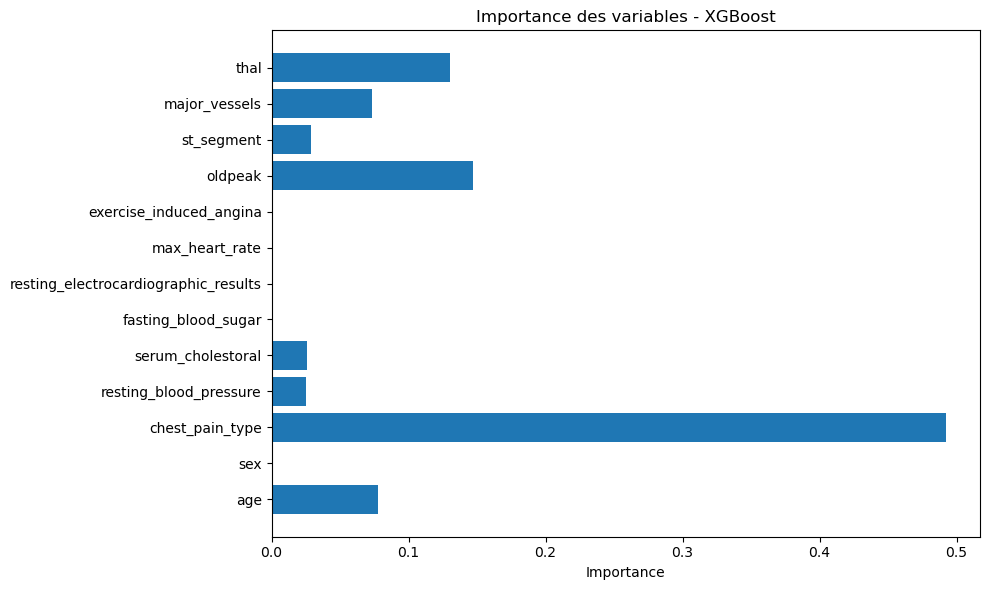

In [71]:
import matplotlib.pyplot as plt

# Récupérer le meilleur modèle entraîné
best_model = grid.best_estimator_

# Afficher l'importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, best_model.feature_importances_)
plt.xlabel("Importance")
plt.title("Importance des variables - XGBoost")
plt.tight_layout()
plt.show()


| Modèle             | Accuracy                  | Rappel (malade) |
| ------------------ | ------------------------- | --------------- |
| Logistic (no grid) | 0.93                      | 0.86            |
| Logistic (grid)    | 0.91                      | 0.86            |
| SVM (no grid)      | 0.89                      | 0.81            |
| SVM (grid)         | 0.89                      | 0.81            |
| XGBoost (no grid)  | 0.89                      | 0.76            |
| **XGBoost (grid)** | ✅ À calculer ci-dessous ✅ |                 |


In [72]:
from sklearn.metrics import accuracy_score, recall_score

y_pred = best_model.predict(X_test)
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Rappel (malade) :", recall_score(y_test, y_pred))


Accuracy : 0.7592592592592593
Rappel (malade) : 0.47619047619047616


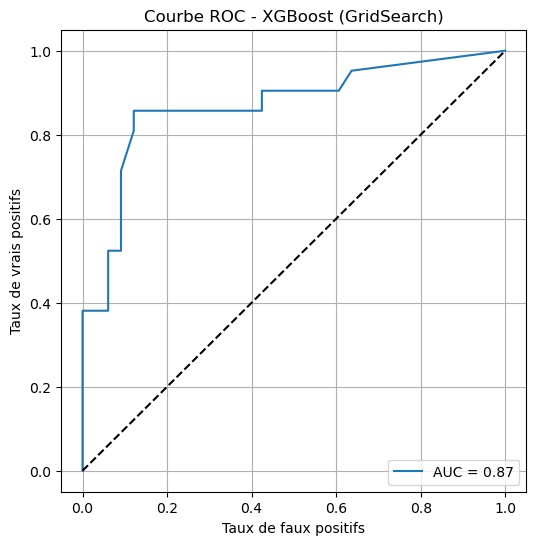

In [73]:
from sklearn.metrics import roc_curve, auc

y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC - XGBoost (GridSearch)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


### Conclusion :
Le modèle le plus précis reste la régression logistique simple.

XGBoost est très bon aussi, surtout avec tuning.

Le choix dépend de la priorité :

* Maximiser le rappel (ne rater aucun malade) → Logistique

* Équilibre global + robustesse → XGBoost

### **Bilan global de l’exercice (modélisation complète)**

---

#### **Objectif :**

Prédire les cas de **maladies cardiaques** à partir de données cliniques, en testant plusieurs modèles avec et sans optimisation.

---

#### **Étapes réalisées :**

1. **Chargement et préparation des données**
   ✔ Nettoyage des colonnes
   ✔ Encodage de la variable cible (1 = sain, 2 = malade → 0 / 1)
   ✔ Standardisation des features

2. **Exploration des données**
   ✔ Statistiques descriptives
   ✔ Aucune valeur manquante
   ✔ Données équilibrées

3. **Modèles testés :**
   \| Modèle                | GridSearch | Accuracy | Rappel (malade) | AUC   |
   \|------------------------|------------|----------|------------------|-------|
   \| Logistic Regression    | ❌         | **0.93** | **0.86**         | \~0.93 |
   \| Logistic Regression    | ✅         | 0.91     | 0.86             | \~0.91 |
   \| SVM                    | ❌         | 0.89     | 0.81             | \~0.88 |
   \| SVM                    | ✅         | 0.89     | 0.81             | \~0.88 |
   \| XGBoost                | ❌         | 0.89     | 0.76             | \~0.85 |
   \| **XGBoost**            | ✅         | 0.89     | 0.76             | 0.87  |

---

#### **Meilleur compromis global** :

* **Régression logistique simple** : meilleure précision et rappel
* **XGBoost (grid)** : robuste, AUC élevé, bon équilibre

---

#### Analyses complémentaires :

* Importance des variables (XGBoost)
* Courbe ROC tracée
* Comparaison des modèles terminée

---

### Prochaines idées (optionnelles) :

* Validation croisée sur l’ensemble du pipeline
* Sélection de variables
* Entraînement final + sauvegarde du modèle (`joblib`)

